In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
conf_arr = pd.read_csv("./../data/pyspark_conf_mat.csv", header=None).as_matrix().astype(int)

In [3]:
conf_arr

array([[6353776,     631],
       [      3,    8210]])

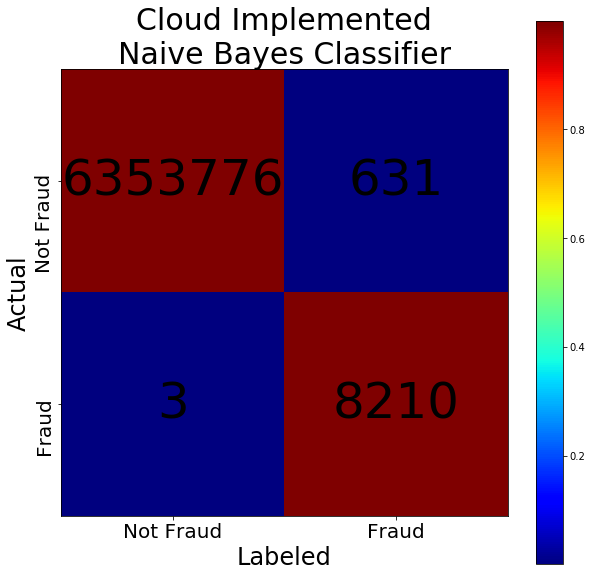

In [9]:
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize = 50
                   )

cb = fig.colorbar(res)
plt.title("Cloud Implemented\nNaive Bayes Classifier", fontsize = 30)
plt.xlabel("Labeled", fontsize = 24)
plt.ylabel("Actual", fontsize = 24)
plt.xticks([0,1], ("Not Fraud", "Fraud"), fontsize = 20)
plt.yticks([0,1], ("Not Fraud", "Fraud"), rotation = "vertical", fontsize = 20)
plt.savefig("./../figures/pyspark_conf_matrix.png", dpi=600)